<a href="https://colab.research.google.com/github/rodmart21/Keras/blob/main/Keras_Basic_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks

We are using different Neural Network solutions from the Keras library to predict a specific variable of our data frame.

### 1) Define the parameters of the model.

In [ ]:
# # Install latest updates of the libraries we will be using.
! pip install --upgrade tensorflow keras

This DataFrame describes a dataset related to the composition and properties of concrete. Each row represents a sample of concrete, and the columns contain values for different variables used in the concrete mix, as well as the resulting properties of the concrete after a certain curing period.

Description of the columns:

-**Cement**: The amount of cement in the mix (measured in kg per cubic meter).

-**Blast Furnace Slag**: The amount of blast furnace slag in the mix (measured in kg per cubic meter).

-**Fly Ash**: The amount of fly ash in the mix (measured in kg per cubic meter).

-**Water**: The amount of water in the mix (measured in kg per cubic meter).

-**Superplasticizer**: The amount of superplasticizer in the mix (measured in kg per cubic meter).

-**Coarse Aggregate**: The amount of coarse aggregate in the mix (measured in kg per cubic meter).

-**Fine Aggregate**: The amount of fine aggregate in the mix (measured in kg per cubic meter).

-**Age**: The age of the concrete in days (the time from when the mix was prepared to when the strength was measured).

-**Strength**: The compressive strength of the concrete (measured in MPa).

In [1]:
# Import all needed libraries
import pandas as pd
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Explore the data
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
# Select the target column
concrete_data_columns = concrete_data.columns
predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength']

## 2) Using few layers and epochs

2.1) Training the model

In [7]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=42)
n_cols = X_train.shape[1]

A nueral network with two layers is defined, one is a hidden layer with 10 neurons and a Relu activation function. The shape is determined by the input data. The second is an exit layer with just 1 neuron. Finally the optimizer algorithm is defined and the loss fucntion thet will be minimized.

In [5]:
# Define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))

    # Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [8]:
# Define the model and some parameters, including how much training information is going to be visualized.
model = regression_model()
model.fit(X_train, y_train, validation_split=0.3, epochs=50, verbose=0)

2.2) Testing the results

In [9]:
y_pred = model.predict(X_test)
error_medio = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", error_medio)

10/10 [==============================] - 0s 2ms/step
Mean Squared Error: 501.59290245618644


Function to calculate the performance of the model

In [10]:
def f(model, predictors, target, num):
    errores=[]
    i=0
    for i in range(num):
        X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3)  # takes random number of samples
        y_pred = model.predict(X_test)
        error_medio = mean_squared_error(y_test, y_pred)
        errores.append(error_medio)
        i+=1
    return errores

In [12]:
#errores=f(model,predictors,target,50)

Plot and print all calculated metrics

10/10 [==============================] - 0s 2ms/step
Train MSE: 465.27, RMSE: 21.57, MAE: 16.85, R²: -0.65
Test MSE: 501.59, RMSE: 22.40, MAE: 17.75, R²: -0.85


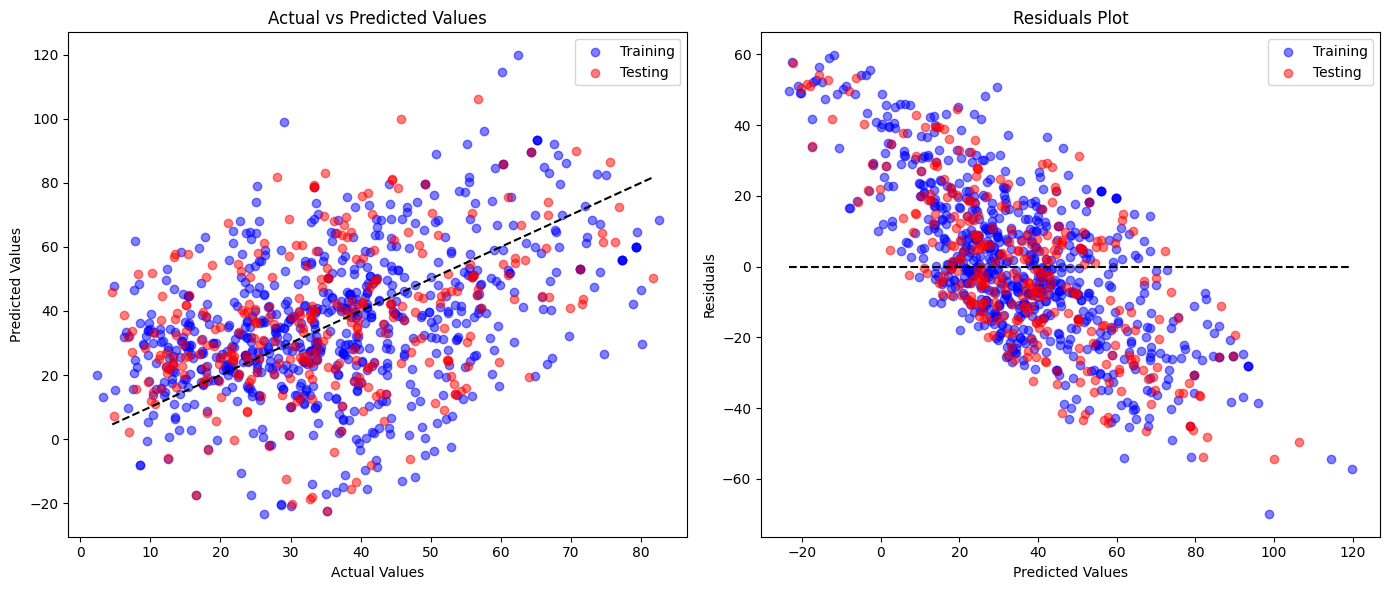

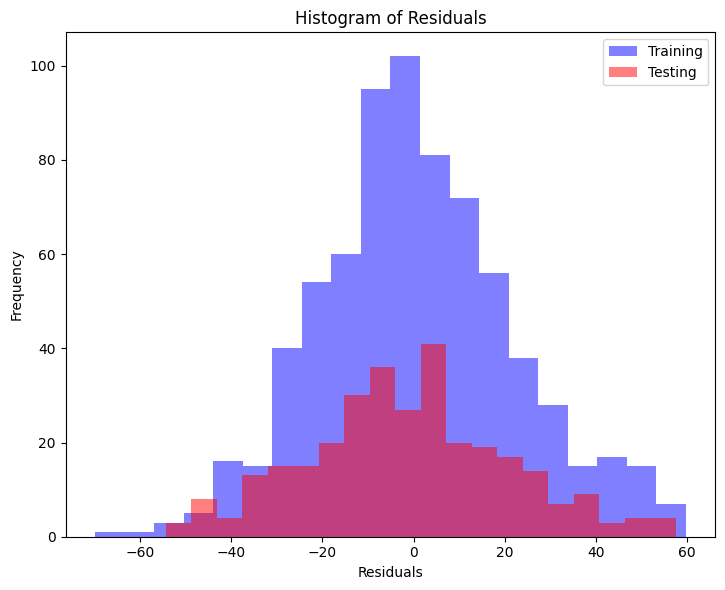

In [16]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate predictions for both the training and the test data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Flatten the predictions to make them 1-dimensional for easier operations
y_pred_train_f = y_pred_train.flatten()
y_pred_test_f = y_pred_test.flatten()

# Calculate different metrics for training and testing data
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the calculated metrics
print(f"Train MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}, MAE: {mae_train:.2f}, R²: {r2_train:.2f}")
print(f"Test MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, MAE: {mae_test:.2f}, R²: {r2_test:.2f}")

# Create scatter plots for both training and test data to visualize the relationship between actual and predicted values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.5, label='Training')
plt.scatter(y_test, y_pred_test, color='red', alpha=0.5, label='Testing')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Create residuals plot
residuals_train = y_train - y_pred_train_f
residuals_test = y_test - y_pred_test_f
plt.subplot(1, 2, 2)
plt.scatter(y_pred_train, residuals_train, color='blue', alpha=0.5, label='Training')
plt.scatter(y_pred_test, residuals_test, color='red', alpha=0.5, label='Testing')
plt.hlines(0, min(y_pred_train), max(y_pred_train), color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.tight_layout()
plt.show()

# Create histograms with residuals
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(residuals_train, bins=20, color='blue', alpha=0.5, label='Training')
plt.hist(residuals_test, bins=20, color='red', alpha=0.5, label='Testing')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.legend()

plt.tight_layout()
plt.show()


## 3) Normalizing data


Standardization is a technique used to center the data around the mean and scale it based on the standard deviation. The resulting dataset will have a mean of 0 and a standard deviation of 1

In [17]:
concrete_data_norm=(concrete_data - concrete_data.mean()) / concrete_data.std()

In [18]:
concrete_data_norm_columns=concrete_data_norm.columns

In [22]:
predictors_norm = concrete_data_norm[concrete_data_norm_columns[concrete_data_norm_columns != 'Strength']] # all columns except Strength
target_norm = concrete_data_norm['Strength']

In [23]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(predictors_norm, target_norm, test_size=0.3)

In [24]:
model.fit(X_train_n, y_train_n, validation_split=0.3, epochs=50, verbose=0)

In [25]:
#errores_n=f(model,predictors_norm,target_norm,50)

# media_n=np.mean(errores_n)
# desviacion_estandar_n = np.std(errores_n)
# print('Con datos normalizados, la media es', media_n, 'y la desviación es', desviacion_estandar_n)

10/10 [==============================] - 0s 2ms/step
Train MSE: 0.45, RMSE: 0.67, MAE: 0.54, R²: 0.55
Test MSE: 0.43, RMSE: 0.65, MAE: 0.54, R²: 0.56


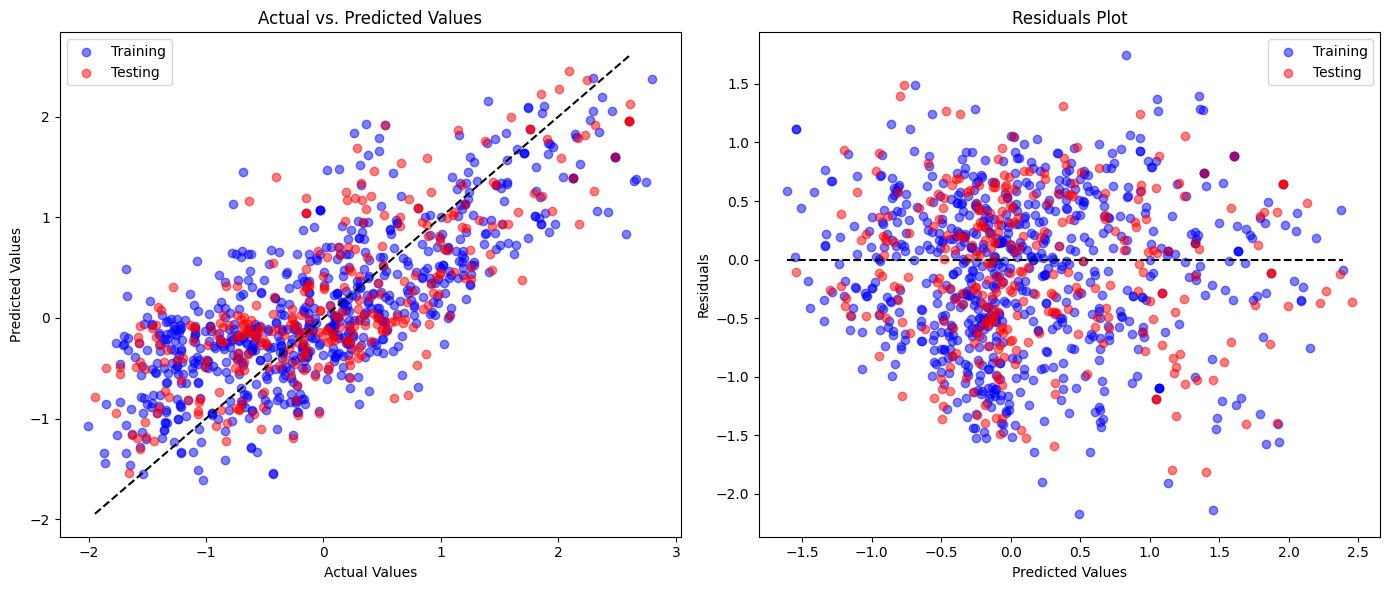

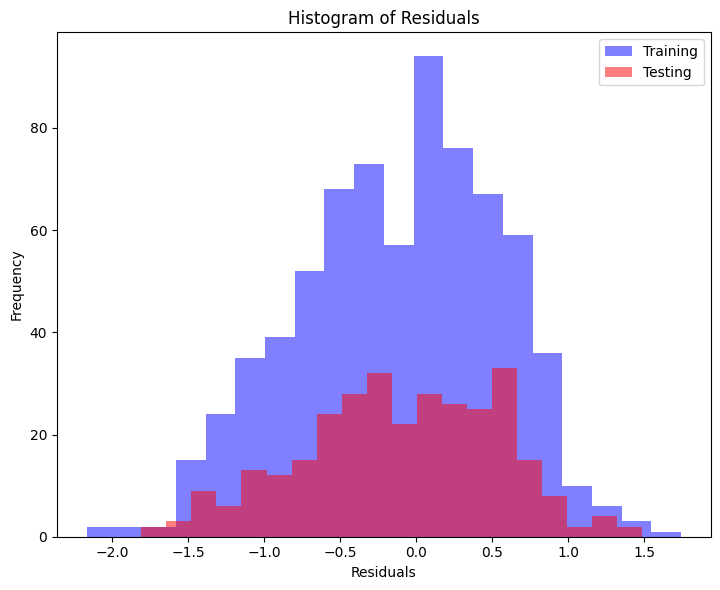

In [26]:
# Predictions for training and test datasets
y_pred_train = model.predict(X_train_n)
y_pred_test = model.predict(X_test_n)

# Flatten predictions for plotting
y_pred_train_f = y_pred_train.flatten()
y_pred_test_f = y_pred_test.flatten()

# Calculate metrics for training and test datasets
mse_train = mean_squared_error(y_train_n, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train_n, y_pred_train)
r2_train = r2_score(y_train_n, y_pred_train)

mse_test = mean_squared_error(y_test_n, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test_n, y_pred_test)
r2_test = r2_score(y_test_n, y_pred_test)

print(f"Train MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}, MAE: {mae_train:.2f}, R²: {r2_train:.2f}")
print(f"Test MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, MAE: {mae_test:.2f}, R²: {r2_test:.2f}")

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train_n, y_pred_train, color='blue', alpha=0.5, label='Training')
plt.scatter(y_test_n, y_pred_test, color='red', alpha=0.5, label='Testing')
plt.plot([min(y_test_n), max(y_test_n)], [min(y_test_n), max(y_test_n)], color='black', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()

# Residuals plot
plt.subplot(1, 2, 2)
residuals_train = y_train_n - y_pred_train_f
residuals_test = y_test_n - y_pred_test_f
plt.scatter(y_pred_train, residuals_train, color='blue', alpha=0.5, label='Training')
plt.scatter(y_pred_test, residuals_test, color='red', alpha=0.5, label='Testing')
plt.hlines(0, min(y_pred_train), max(y_pred_train), color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()

plt.tight_layout()
plt.show()

# Histogram of residuals
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(residuals_train, bins=20, color='blue', alpha=0.5, label='Training')
plt.hist(residuals_test, bins=20, color='red', alpha=0.5, label='Testing')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.legend()

plt.tight_layout()
plt.show()

## 4) Increasing the number of epochs

In [27]:
model.fit(X_train_n, y_train_n, validation_split=0.3, epochs=100, verbose=0)

In [29]:
# errores_n=f(model,predictors_norm,target_norm,50)
# media_n=np.mean(errores_n)
# desviacion_estandar_n = np.std(errores_n)
# print('Con datos normalizados, la media es', media_n, 'y la desviación es', desviacion_estandar_n)

10/10 [==============================] - 0s 3ms/step
Train MSE: 0.37, RMSE: 0.60, MAE: 0.48, R²: 0.64
Test MSE: 0.38, RMSE: 0.62, MAE: 0.50, R²: 0.61


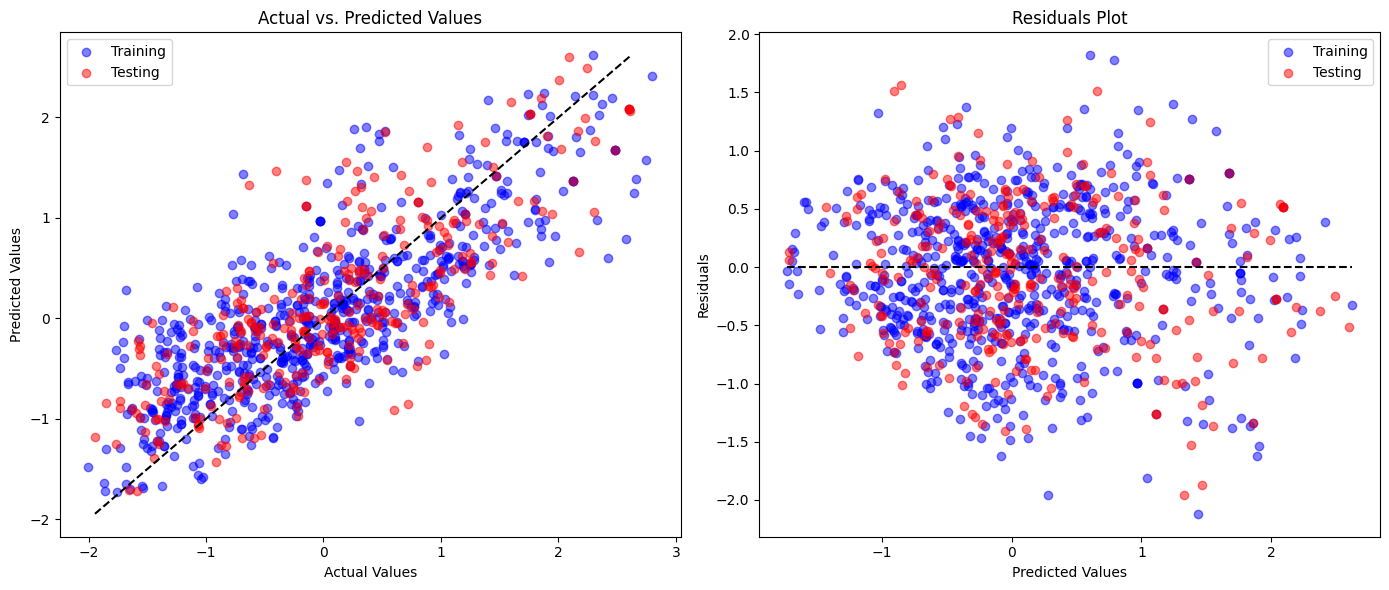

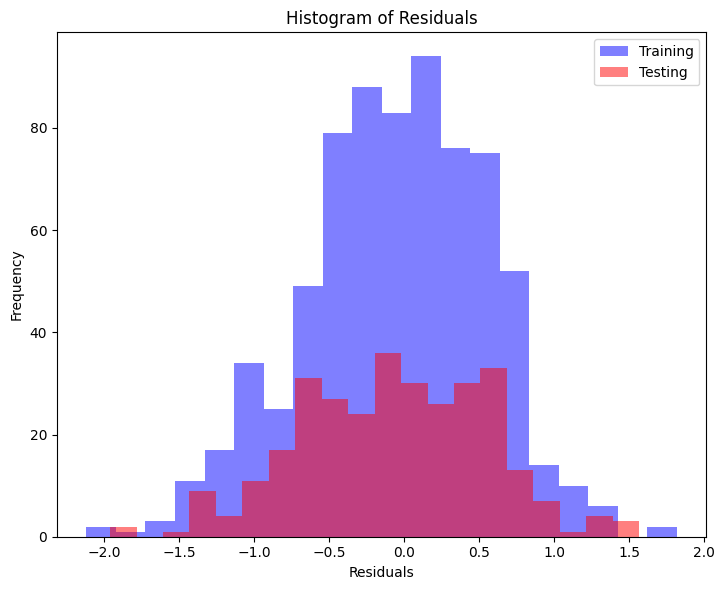

In [30]:
# Predictions for training and test datasets
y_pred_train = model.predict(X_train_n)
y_pred_test = model.predict(X_test_n)

# Flatten predictions for plotting
y_pred_train_f = y_pred_train.flatten()
y_pred_test_f = y_pred_test.flatten()

# Calculate metrics for training and test datasets
mse_train = mean_squared_error(y_train_n, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train_n, y_pred_train)
r2_train = r2_score(y_train_n, y_pred_train)

mse_test = mean_squared_error(y_test_n, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test_n, y_pred_test)
r2_test = r2_score(y_test_n, y_pred_test)

print(f"Train MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}, MAE: {mae_train:.2f}, R²: {r2_train:.2f}")
print(f"Test MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, MAE: {mae_test:.2f}, R²: {r2_test:.2f}")

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train_n, y_pred_train, color='blue', alpha=0.5, label='Training')
plt.scatter(y_test_n, y_pred_test, color='red', alpha=0.5, label='Testing')
plt.plot([min(y_test_n), max(y_test_n)], [min(y_test_n), max(y_test_n)], color='black', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()

# Residuals plot
plt.subplot(1, 2, 2)
residuals_train = y_train_n - y_pred_train_f
residuals_test = y_test_n - y_pred_test_f
plt.scatter(y_pred_train, residuals_train, color='blue', alpha=0.5, label='Training')
plt.scatter(y_pred_test, residuals_test, color='red', alpha=0.5, label='Testing')
plt.hlines(0, min(y_pred_train), max(y_pred_train), color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()

plt.tight_layout()
plt.show()

# Histogram of residuals
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(residuals_train, bins=20, color='blue', alpha=0.5, label='Training')
plt.hist(residuals_test, bins=20, color='red', alpha=0.5, label='Testing')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
concrete_data.head(2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89


## *Take the predicted and real values and calculate the aboslute value of their diference

In [ ]:
X_test_n['Cement_Real']=y_test_n
X_test_n['Cement_Pred']=y_pred_test
X_test_n['Dif']=abs(abs(X_test_n['Cement_Real'])- abs(X_test_n['Cement_Pred']))

In [ ]:
X_test_n.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Cement_Real,Cement_Pred,Dif
394,1.184924,-0.856472,-0.846733,-0.307540,-1.038638,1.891622,-0.980100,-0.279597,0.986609,0.226942,0.759667
311,0.139055,-0.856472,0.647087,-0.471442,0.451190,-0.229171,1.067895,-0.279597,0.246744,0.036288,0.210456
907,0.314164,0.824116,0.918975,-0.120224,0.300534,-1.336510,-1.042463,-0.279597,0.623261,0.560394,0.062867
767,0.993548,-0.856472,-0.846733,0.207580,-1.038638,-0.088985,-0.131966,-0.279597,-0.267451,-0.022614,0.244837
902,0.476834,1.113872,-0.846733,0.629043,0.300534,-2.082453,0.354464,-0.279597,1.244604,0.896050,0.348554


In [ ]:
X_test_n.Dif.describe()

count    309.000000
mean       0.322638
std        0.267646
min        0.000306
25%        0.120417
50%        0.256625
75%        0.454429
max        1.853926
Name: Dif, dtype: float64

### 5. Adding more layers

In [34]:
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [35]:
model.fit(X_train_n, y_train_n, validation_split=0.3, epochs=100, verbose=0)

In [33]:
# errores_n=f(model,predictors_norm,target_norm,50)
# media_n=np.mean(errores_n)
# desviacion_estandar_n = np.std(errores_n)
# print('Con datos normalizados, la media es', media_n, 'y la desviación es', desviacion_estandar_n)

10/10 [==============================] - 0s 3ms/step
Train MSE: 0.31, RMSE: 0.56, MAE: 0.44, R²: 0.69
Test MSE: 0.34, RMSE: 0.59, MAE: 0.47, R²: 0.65


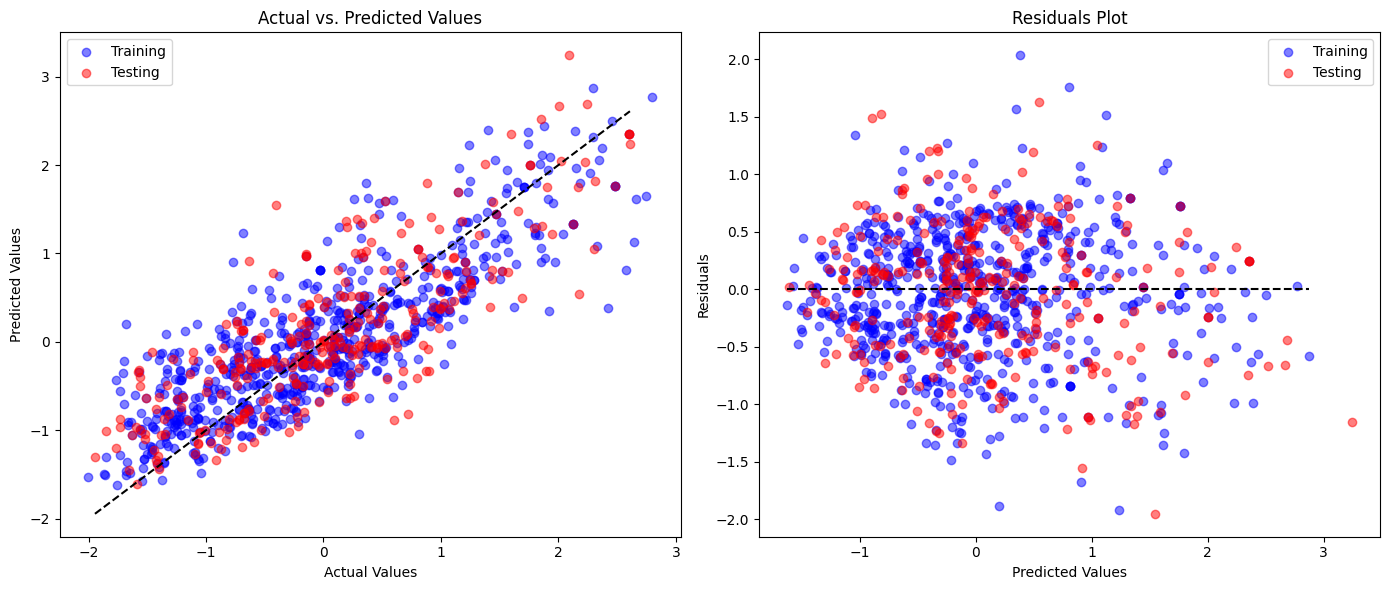

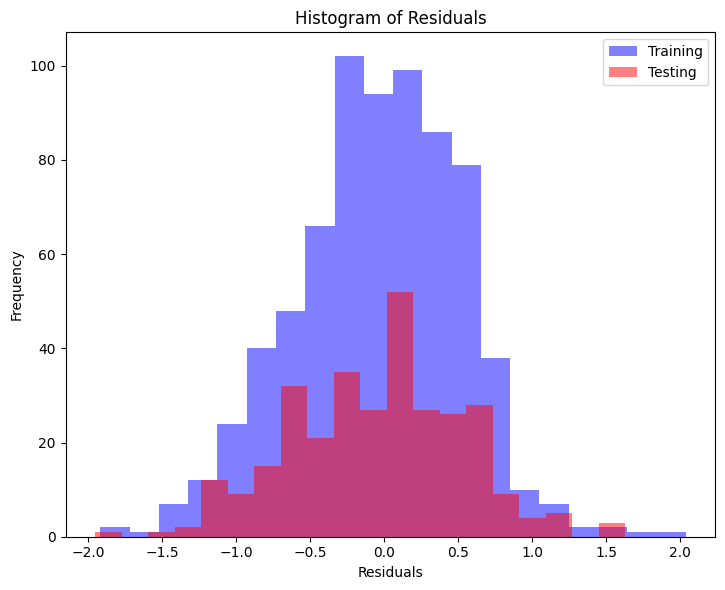

In [36]:
# Predictions for training and test datasets
y_pred_train = model.predict(X_train_n)
y_pred_test = model.predict(X_test_n)

# Flatten predictions for plotting
y_pred_train_f = y_pred_train.flatten()
y_pred_test_f = y_pred_test.flatten()

# Calculate metrics for training and test datasets
mse_train = mean_squared_error(y_train_n, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train_n, y_pred_train)
r2_train = r2_score(y_train_n, y_pred_train)

mse_test = mean_squared_error(y_test_n, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test_n, y_pred_test)
r2_test = r2_score(y_test_n, y_pred_test)

print(f"Train MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}, MAE: {mae_train:.2f}, R²: {r2_train:.2f}")
print(f"Test MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, MAE: {mae_test:.2f}, R²: {r2_test:.2f}")

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train_n, y_pred_train, color='blue', alpha=0.5, label='Training')
plt.scatter(y_test_n, y_pred_test, color='red', alpha=0.5, label='Testing')
plt.plot([min(y_test_n), max(y_test_n)], [min(y_test_n), max(y_test_n)], color='black', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()

# Residuals plot
plt.subplot(1, 2, 2)
residuals_train = y_train_n - y_pred_train_f
residuals_test = y_test_n - y_pred_test_f
plt.scatter(y_pred_train, residuals_train, color='blue', alpha=0.5, label='Training')
plt.scatter(y_pred_test, residuals_test, color='red', alpha=0.5, label='Testing')
plt.hlines(0, min(y_pred_train), max(y_pred_train), color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()

plt.tight_layout()
plt.show()

# Histogram of residuals
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(residuals_train, bins=20, color='blue', alpha=0.5, label='Training')
plt.hist(residuals_test, bins=20, color='red', alpha=0.5, label='Testing')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.legend()

plt.tight_layout()
plt.show()